In [1]:
from SpectrumAnalysis.SpectrumAnalysis import extract_data_from_files, load_data_from_fits, plot_Efields_from_fits, plot_fft_from_fits

In [2]:
results = extract_data_from_files('./raw_data')

Skipping T file (no match): Reference_vacuum_OPT.txt
Saved to InSb_0T.fits
Saved to InSb_70K.fits
Saved to Polarizer_125deg_InSb_70K.fits
Saved to Polarizer_35deg_InSb_70K.fits
Saved to Polarizer_35deg_InSb_70K_0T.fits
Saved to Polarizer_125deg_Aperture.fits
Saved to Polarizer_35deg_Aperture.fits


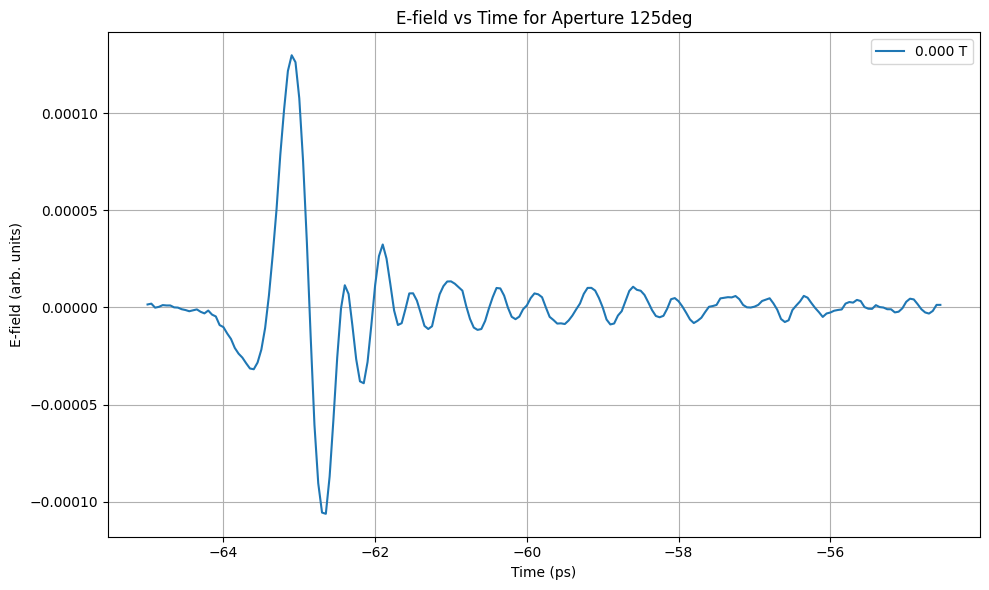

In [3]:
plot_Efields_from_fits('./Polarizer_125deg_Aperture.fits', title="E-field vs Time for Aperture 125deg")

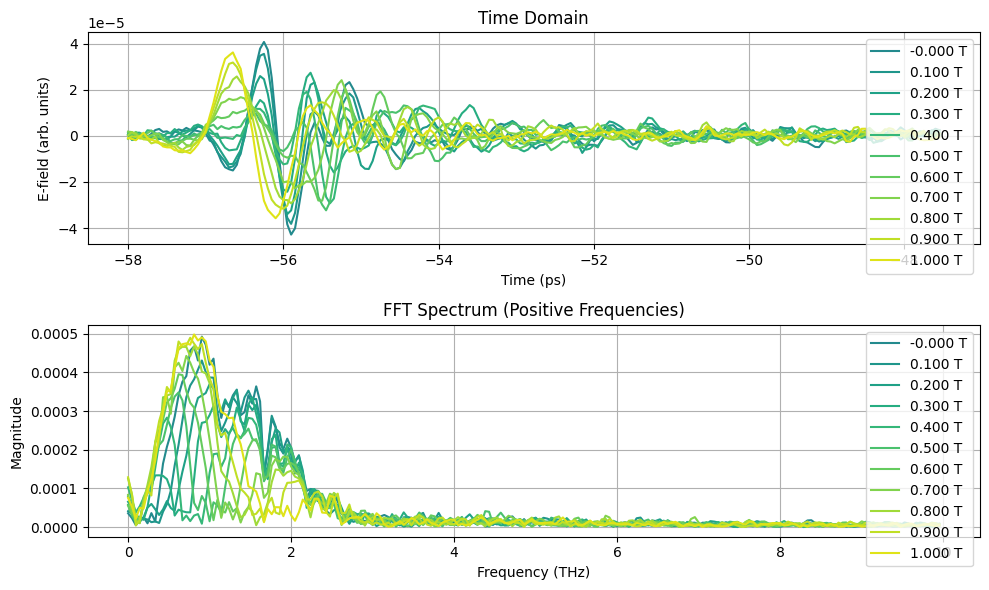

In [4]:
plot_fft_from_fits("Polarizer_35deg_InSb_70K.fits", zero_padding_ratio=2.0, plot_time_domain=True)

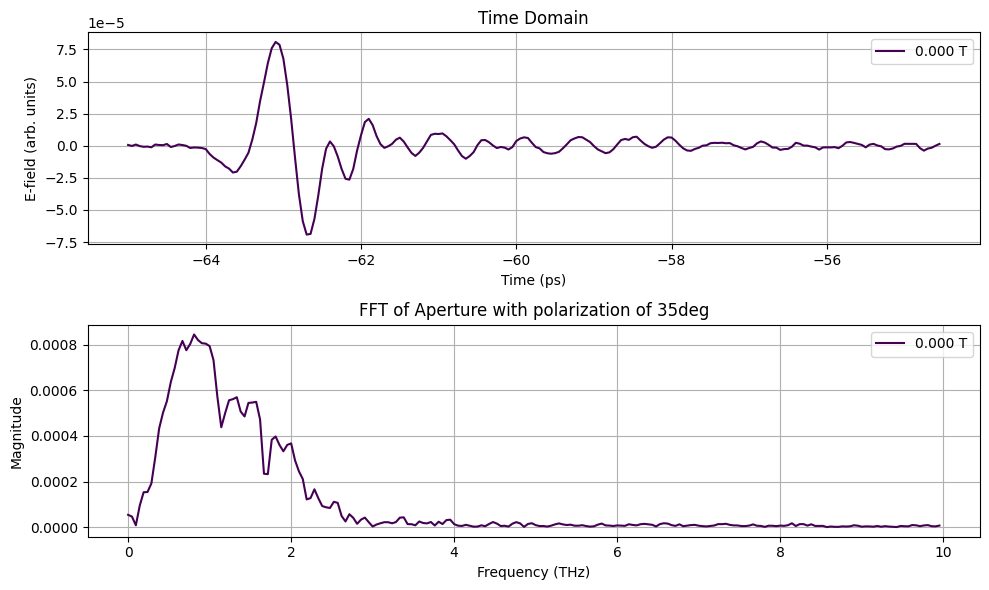

In [19]:
plot_fft_from_fits("Polarizer_35deg_Aperture.fits", zero_padding_ratio=2.0, plot_time_domain=True, title="FFT of Aperture with polarization of 35deg")

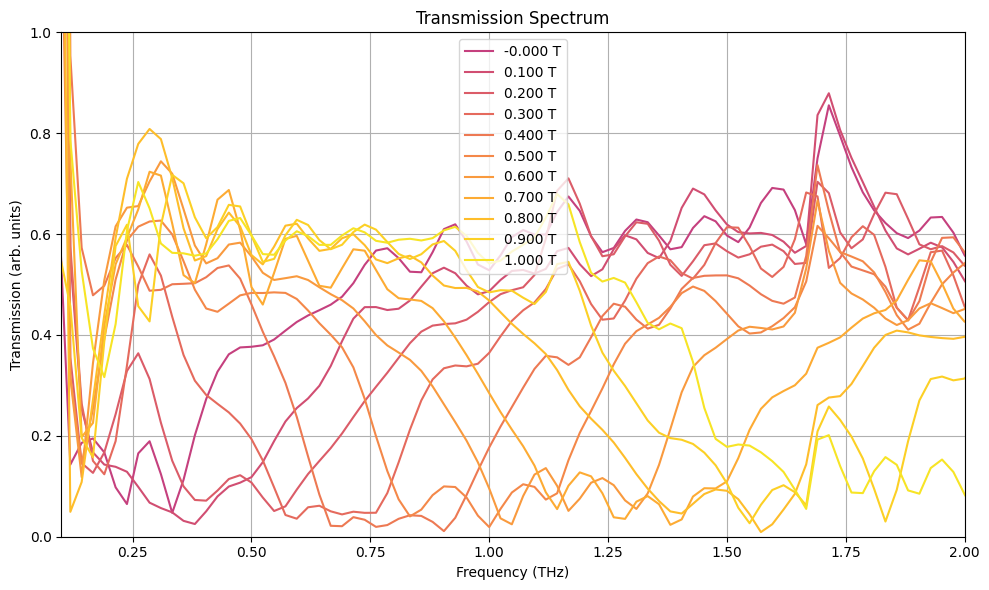

In [6]:
from SpectrumAnalysis.SpectrumAnalysis import plot_transmission_spectrum
plot_transmission_spectrum('./Polarizer_35deg_Aperture.fits', './Polarizer_35deg_InSb_70K.fits', zero_padding_ratio=4.0, freq_range=[0.1, 2])

In [7]:
from SpectrumAnalysis.SpectrumAnalysis import add_data_value, subtract_data_value
add_data_value('Polarizer_35deg_InSb_70K.fits','Polarizer_125deg_InSb_70K.fits', 'Ex_InSb_70K.fits')
subtract_data_value('Polarizer_35deg_InSb_70K.fits','Polarizer_125deg_InSb_70K.fits', 'Ey_InSb_70K.fits')

-1.0 T → step: 50 fs, start: -58 ps, delay: 500 ms, points: 210
-0.9 T → step: 50 fs, start: -58 ps, delay: 500 ms, points: 210
-0.8 T → step: 50 fs, start: -58 ps, delay: 500 ms, points: 210
-0.7 T → step: 50 fs, start: -58 ps, delay: 500 ms, points: 210
-0.6 T → step: 50 fs, start: -58 ps, delay: 500 ms, points: 210
-0.5 T → step: 50 fs, start: -58 ps, delay: 500 ms, points: 210
-0.4 T → step: 50 fs, start: -58 ps, delay: 500 ms, points: 210
-0.3 T → step: 50 fs, start: -58 ps, delay: 500 ms, points: 210
-0.2 T → step: 50 fs, start: -58 ps, delay: 500 ms, points: 210
-0.1 T → step: 50 fs, start: -58 ps, delay: 500 ms, points: 210
-0.0 T → step: 50 fs, start: -58 ps, delay: 500 ms, points: 210
0.1 T → step: 50 fs, start: -58 ps, delay: 500 ms, points: 210
0.2 T → step: 50 fs, start: -58 ps, delay: 500 ms, points: 210
0.3 T → step: 50 fs, start: -58 ps, delay: 500 ms, points: 210
0.4 T → step: 50 fs, start: -58 ps, delay: 500 ms, points: 210
0.5 T → step: 50 fs, start: -58 ps, delay: 5

defaultdict(dict,
            {-1.0: {'step_fs': 50,
              'start_ps': -58,
              'delay_ms': 500,
              'data': array([[-5.8000000e+01,  8.0466800e-07],
                     [-5.7950000e+01, -4.1723500e-07],
                     [-5.7900000e+01, -2.3841950e-07],
                     [-5.7850000e+01,  8.6427300e-07],
                     [-5.7800000e+01,  1.6689351e-06],
                     [-5.7750000e+01,  1.8179520e-06],
                     [-5.7700000e+01,  1.2815000e-06],
                     [-5.7650000e+01,  1.8775600e-06],
                     [-5.7600000e+01,  1.7881500e-06],
                     [-5.7550000e+01, -1.8775700e-06],
                     [-5.7500000e+01, -1.5199200e-06],
                     [-5.7450000e+01,  1.9371500e-06],
                     [-5.7400000e+01,  6.2585100e-06],
                     [-5.7350000e+01,  6.1988800e-06],
                     [-5.7300000e+01,  4.9770400e-06],
                     [-5.7250000e+01,  3.6954400e-06

In [16]:
from SpectrumAnalysis.SpectrumAnalysis import rotate_angle_vs_major_axis
rotate_angle_vs_major_axis(Ex_fits = 'Ex_InSb_70K.fits' , Ey_fits= 'Ey_InSb_70K.fits', angle_in_deg = 80, output_path_major = 'Ex_major_InSb_70K.fits', output_path_minor = 'Ey_minor_InSb_70K.fits')

-1.0 T → step: 50 fs, start: -58 ps, delay: 500 ms, points: 210
-0.9 T → step: 50 fs, start: -58 ps, delay: 500 ms, points: 210
-0.8 T → step: 50 fs, start: -58 ps, delay: 500 ms, points: 210
-0.7 T → step: 50 fs, start: -58 ps, delay: 500 ms, points: 210
-0.6 T → step: 50 fs, start: -58 ps, delay: 500 ms, points: 210
-0.5 T → step: 50 fs, start: -58 ps, delay: 500 ms, points: 210
-0.4 T → step: 50 fs, start: -58 ps, delay: 500 ms, points: 210
-0.3 T → step: 50 fs, start: -58 ps, delay: 500 ms, points: 210
-0.2 T → step: 50 fs, start: -58 ps, delay: 500 ms, points: 210
-0.1 T → step: 50 fs, start: -58 ps, delay: 500 ms, points: 210
-0.0 T → step: 50 fs, start: -58 ps, delay: 500 ms, points: 210
0.1 T → step: 50 fs, start: -58 ps, delay: 500 ms, points: 210
0.2 T → step: 50 fs, start: -58 ps, delay: 500 ms, points: 210
0.3 T → step: 50 fs, start: -58 ps, delay: 500 ms, points: 210
0.4 T → step: 50 fs, start: -58 ps, delay: 500 ms, points: 210
0.5 T → step: 50 fs, start: -58 ps, delay: 5

(defaultdict(dict,
             {-1.0: {'step_fs': 50,
               'start_ps': -58,
               'delay_ms': 500,
               'data': array([[-5.80000000e+01,  1.24417973e-07],
                      [-5.79500000e+01, -6.90640962e-07],
                      [-5.79000000e+01,  2.17499018e-07],
                      [-5.78500000e+01, -1.41211746e-06],
                      [-5.78000000e+01, -1.81598864e-06],
                      [-5.77500000e+01, -3.22130812e-06],
                      [-5.77000000e+01, -5.59353375e-06],
                      [-5.76500000e+01, -6.16663421e-06],
                      [-5.76000000e+01, -6.53265240e-06],
                      [-5.75500000e+01, -8.09732939e-06],
                      [-5.75000000e+01, -9.39212838e-06],
                      [-5.74500000e+01, -1.22230023e-05],
                      [-5.74000000e+01, -1.63486302e-05],
                      [-5.73500000e+01, -1.71013341e-05],
                      [-5.73000000e+01, -1.92078346e-05],
   

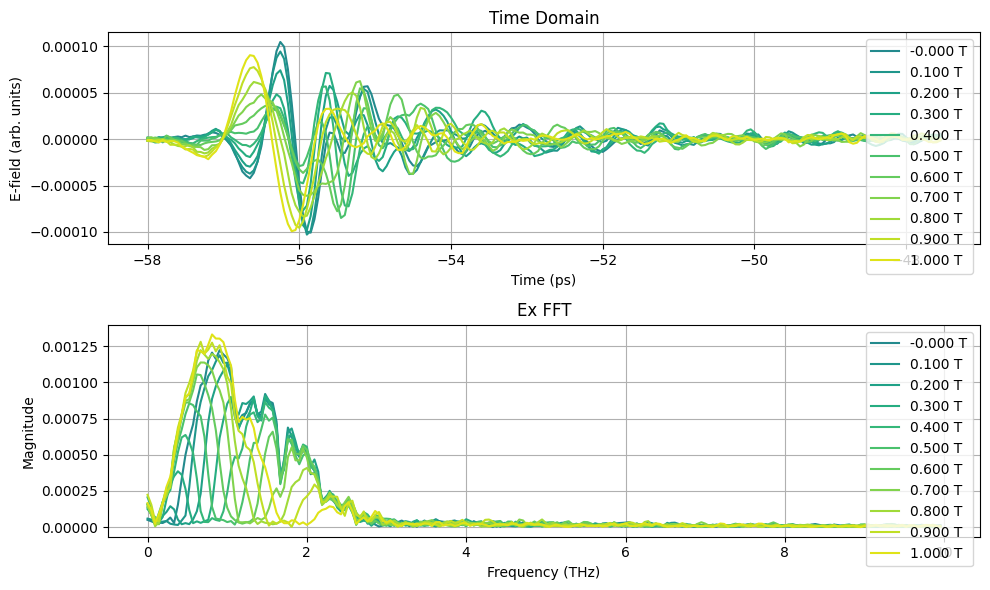

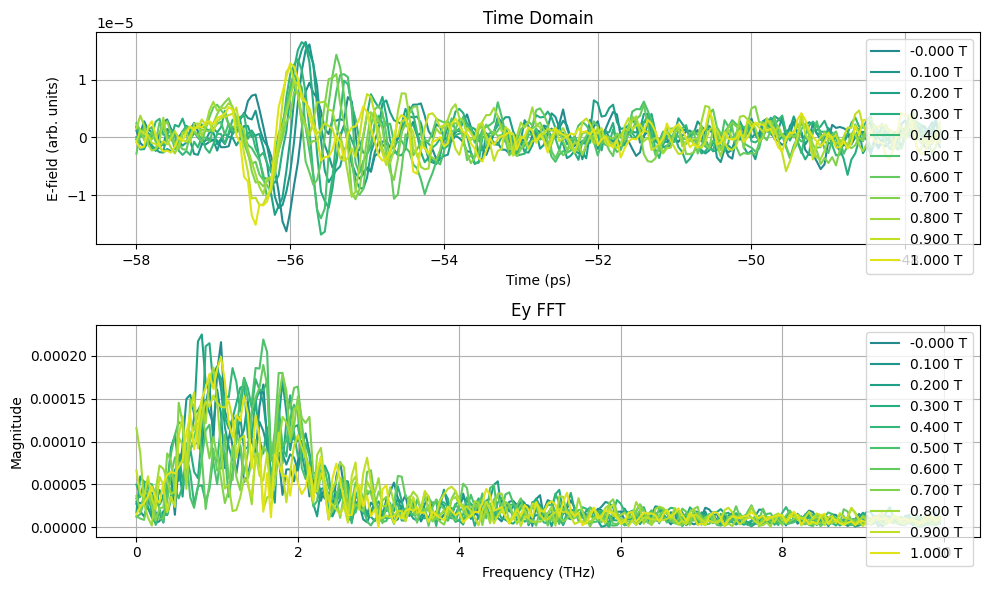

In [17]:
plot_fft_from_fits("Ex_major_InSb_70K.fits", zero_padding_ratio=2.0, plot_time_domain=True, title = "Ex FFT")
plot_fft_from_fits("Ey_minor_InSb_70K.fits", zero_padding_ratio=2.0, plot_time_domain=True, title = "Ey FFT")